In [1]:
import pandas as pd
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt
import sklearn.metrics
plt.rcParams['font.sans-serif'] = ['SimHei']

In [3]:
# df = pd.read_csv('headup_detect_delay_test_0.3_0.9_1685593125955.csv')
# df = pd.read_csv('20230601_15_13_41_headup_detect_delay_test_0.3_0.9.csv')

# df = pd.read_csv('20230603_19_44_00_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-cpu.csv')

# df = pd.read_csv('20230603_20_18_53_headup_detect_delay_test_0.3_0.9_tx2-pure-edge-gpu.csv')

# df = pd.read_csv('20230603_20_37_12_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230604_15_18_58_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230604_16_02_21_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230604_16_17_45_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230605_10_00_21_headup_detect_delay_test_0.3_0.9_bigger-tom-cpu.csv')
# df = pd.read_csv('20230605_10_23_37_headup_detect_delay_test_0.3_0.9_bigger-tom-cpu.csv')
# df = pd.read_csv('20230605_11_34_00_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230605_11_44_13_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')
# df = pd.read_csv('20230606_14_07_27_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-cpu-golden.csv')
# df = pd.read_csv('20230606_16_28_39_headup_detect_delay_test_0.3_0.9_tx2-pure-edge-gpu-golden.csv')
df = pd.read_csv('20230709_17_12_58_car_detect_delay_test_new_0.2_0.8_gpu.csv')

df = df[1:]
max_fps = 30
df.loc[df['fps'] >= 30, 'fps'] = max_fps
resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
df['resolution'] = df['resolution'].replace(resolution_map)

df

,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,2.0,7,6,20,1,1.486893,host,host
2,3,5.0,7,3,10,1,0.698550,host,host
3,4,6.0,7,4,5,1,1.543717,host,host
4,5,7.0,7,4,1,1,1.464447,host,host
5,6,8.0,7,3,1,1,1.420342,host,host
...,...,...,...,...,...,...,...,...,...
474,475,826.0,19,5,20,0,0.333481,cloud,cloud
475,476,828.0,18,4,10,0,0.282343,cloud,cloud
476,477,829.0,19,1,10,0,0.358456,cloud,cloud
477,478,831.0,18,4,10,0,0.226906,cloud,cloud


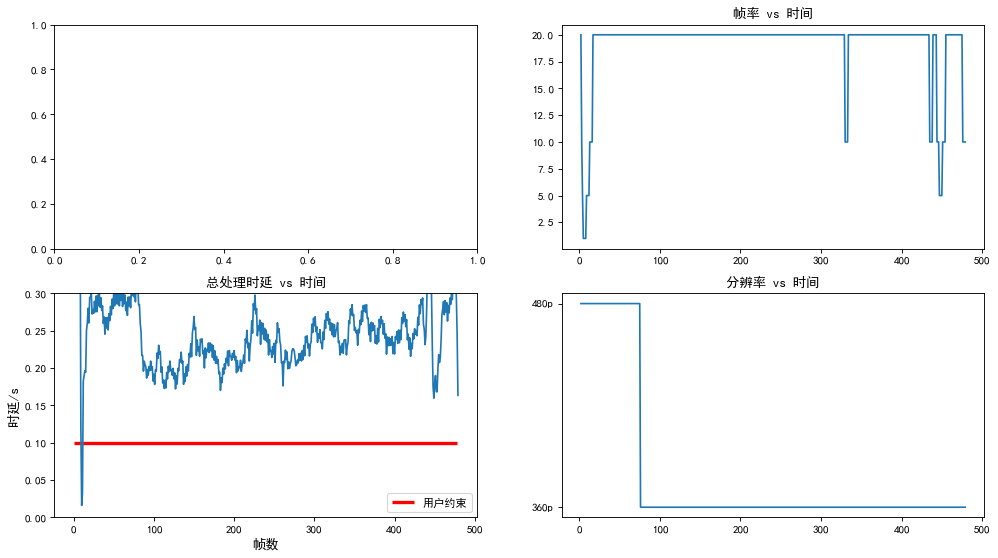

In [4]:
fig, axs = plt.subplots(2, 2, figsize=(15, 8), dpi=80)

axs[1,0].hlines(y=0.1, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='用户约束')
axs[1,0].plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# axs[1,0].plot(df['n_loop'], df['delay'])
axs[1,0].title.set_text('总处理时延 vs 时间')
axs[1,0].set_xlabel("帧数", fontsize=12)
axs[1,0].set_ylabel("时延/s", fontsize=12)
axs[1,0].set_ylim(0, 0.3)
axs[1,0].legend()


axs[0,1].plot(df['n_loop'], df['fps'])
axs[0,1].title.set_text('帧率 vs 时间')

axs[1,1].set_yticks(np.arange(4))
axs[1,1].set_yticklabels(resolution_map.keys())
axs[1,1].plot(df['n_loop'], df['resolution'])
axs[1,1].title.set_text('分辨率 vs 时间')

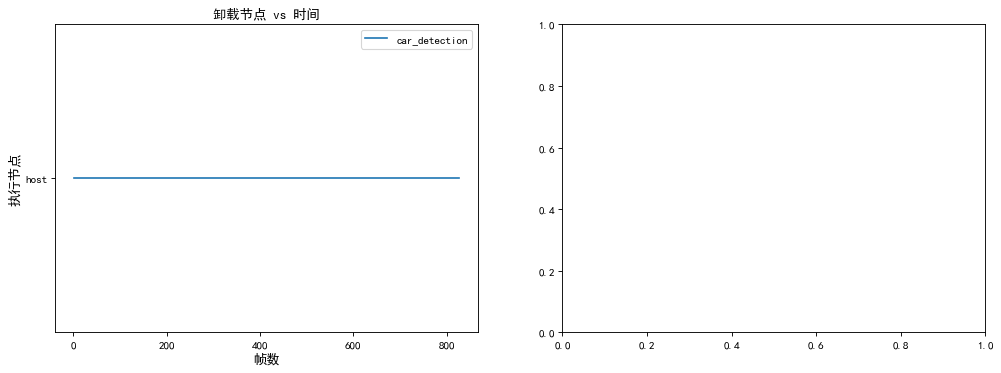

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5), dpi=80)
axs[0].plot(df['n_loop'], df['car_detection'], label='car_detection')
axs[0].set_xlabel("帧数", fontsize=12)
axs[0].set_ylabel("执行节点", fontsize=12)
axs[0].title.set_text('卸载节点 vs 时间')
axs[0].legend()

# 与黄金配置比较

In [147]:
df = pd.read_csv('20230605_11_44_13_headup_detect_delay_test_0.3_0.9_tx2-gpu-rack-cpu.csv')

df_golden = pd.read_csv('20230606_14_07_27_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-cpu-golden.csv')
# df_golden = pd.read_csv('20230606_16_28_39_headup_detect_delay_test_0.3_0.9_tx2-pure-edge-gpu-golden.csv')
# df_golden = pd.read_csv('20230606_16_49_35_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-gpu-golden.csv')


def pre_treat(df):    
    df = df[1:]

    max_fps = 30
    df.loc[df['fps'] >= 30, 'fps'] = max_fps
    resolution_map = {"360p": 0, "480p": 1, "720p": 2, "1080p": 3}
    df['resolution'] = df['resolution'].replace(resolution_map)
    
    return df

df = pre_treat(df)
df_golden = pre_treat(df_golden)
df

C:\P\Anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Peng_\AppData\Local\Temp/ipykernel_15356/4118912116.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['resolution'] = df['resolution'].replace(resolution_map)


,n_loop,frame_id,total,up,fps,resolution,delay,face_detection,face_alignment
1,2,3.0,7,5,24,1,0.246405,host,host
2,3,4.0,7,6,24,1,0.246405,host,host
3,4,5.0,7,5,24,1,0.161471,host,host
4,5,7.0,7,7,24,1,0.161471,host,host
5,6,8.0,7,7,24,1,0.240157,host,host
...,...,...,...,...,...,...,...,...,...
718,719,822.0,20,11,10,3,0.229826,cloud,cloud
719,720,825.0,19,13,10,3,0.222967,host,cloud
720,721,828.0,19,13,10,3,0.222967,host,cloud
721,722,831.0,18,12,10,3,0.172950,host,cloud


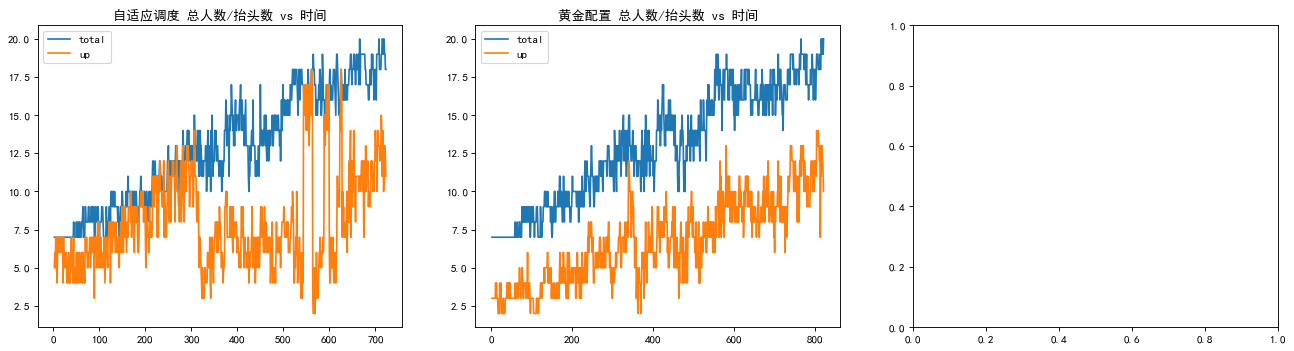

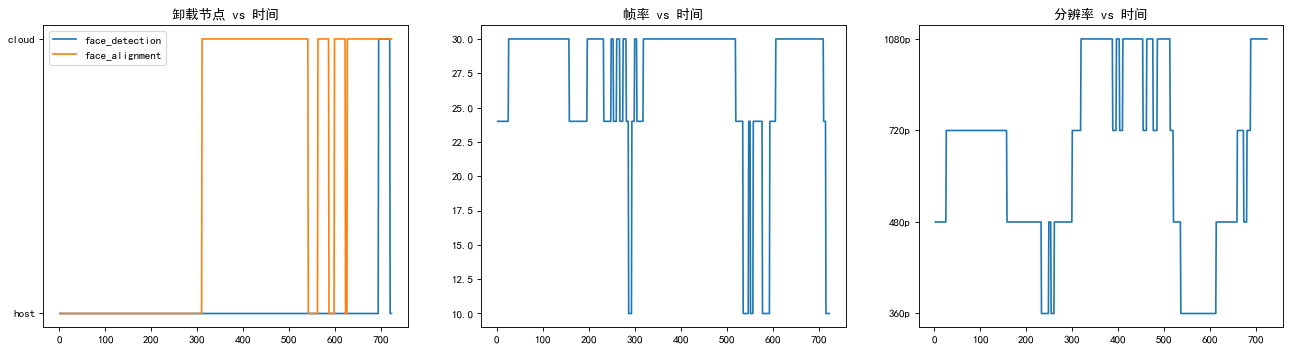

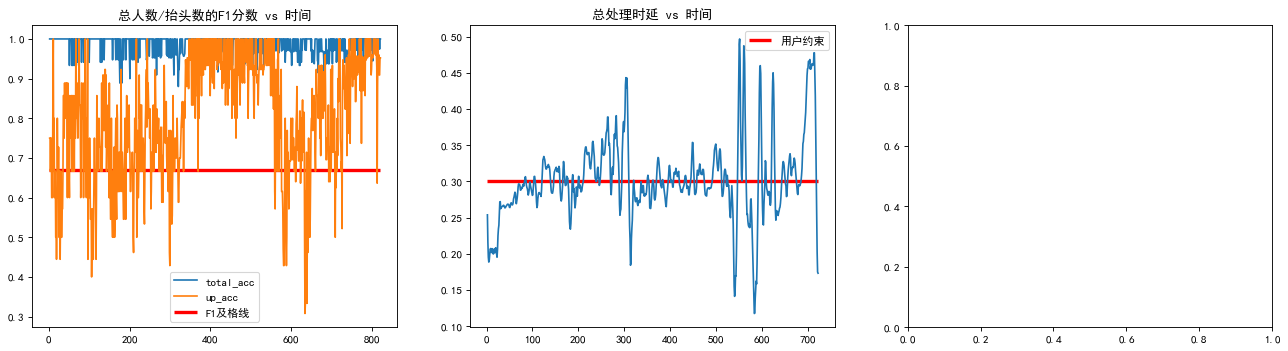

In [148]:
gt_res = df_golden[['frame_id', 'total', 'up']].copy()
act_res = df[['frame_id', 'total', 'up']].copy()
matched_df = pd.merge(gt_res, act_res, on=['frame_id'], how='left').fillna(method='ffill').fillna(method='bfill')

def get_f1(matched_df, true_col, pred_col):
    TP = matched_df[[true_col, pred_col]].min(axis=1)
    FP = matched_df[pred_col] - TP
    FN = matched_df[true_col] - TP
    PRECISION = (TP) / (TP + FP)
    RECALL = (TP) / (TP + FN)
#     return RECALL
    return 2 * (RECALL * PRECISION) / (RECALL + PRECISION)

matched_df['total_f1'] = get_f1(matched_df, 'total_x', 'total_y')
matched_df['up_f1'] = get_f1(matched_df, 'up_x', 'up_y')

# 检测结果
fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=80)

axs[0].plot(df['n_loop'], df['total'], label='total')
axs[0].plot(df['n_loop'], df['up'], label='up')
axs[0].title.set_text('自适应调度 总人数/抬头数 vs 时间')
axs[0].legend()

axs[1].plot(df_golden['n_loop'], df_golden['total'], label='total')
axs[1].plot(df_golden['n_loop'], df_golden['up'], label='up')
axs[1].title.set_text('黄金配置 总人数/抬头数 vs 时间')
axs[1].legend()



# 调度策略
fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=80)
axs[0].plot(df['n_loop'], df['face_detection'], label='face_detection')
axs[0].plot(df['n_loop'], df['face_alignment'], label='face_alignment')
axs[0].title.set_text('卸载节点 vs 时间')
axs[0].legend()


axs[1].plot(df['n_loop'], df['fps'])
axs[1].title.set_text('帧率 vs 时间')

axs[2].set_yticks(np.arange(4))
axs[2].set_yticklabels(resolution_map.keys())
axs[2].plot(df['n_loop'], df['resolution'])
axs[2].title.set_text('分辨率 vs 时间')


# 精度&时延情况
fig, axs = plt.subplots(1, 3, figsize=(20, 5), dpi=80)

axs[0].hlines(y=0.67, xmin=0, xmax=len(matched_df['frame_id']), linewidth=3, color='r', label='F1及格线')
axs[0].plot(matched_df['frame_id'], matched_df['total_f1'], label='total_acc')
axs[0].plot(matched_df['frame_id'], matched_df['up_f1'], label='up_acc')
axs[0].title.set_text('总人数/抬头数的F1分数 vs 时间')
axs[0].legend()

axs[1].hlines(y=0.3, xmin=0, xmax=len(df['n_loop']), linewidth=3, color='r', label='用户约束')
axs[1].plot(df['n_loop'], scipy.signal.savgol_filter(df['delay'], 11, 3))
# axs[1,0].plot(df['n_loop'], df['delay'])
axs[1].title.set_text('总处理时延 vs 时间')
axs[1].legend()


# CPU和GPU精度对比

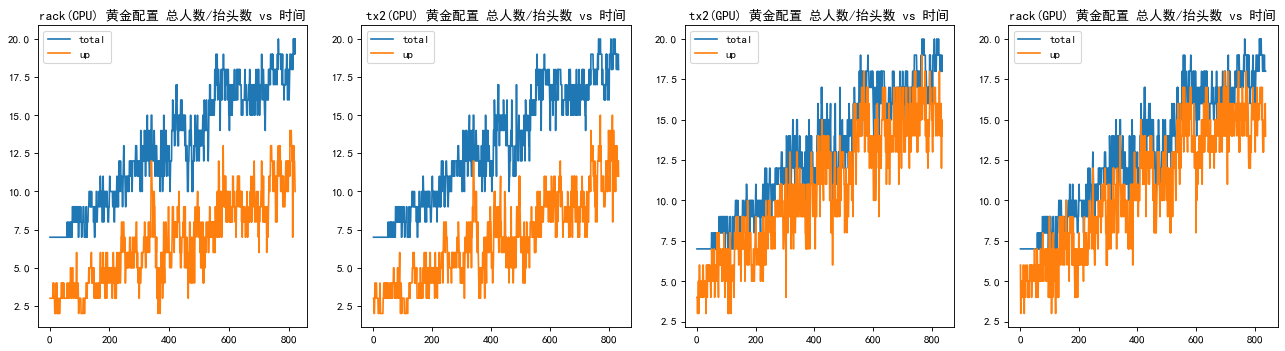

In [154]:
fig, axs = plt.subplots(1, 4, figsize=(20, 5), dpi=80)

def plot_golden_in_axs(idx, axs, df, text):
    axs[idx].plot(df['n_loop'], df['total'], label='total')
    axs[idx].plot(df['n_loop'], df['up'], label='up')
    axs[idx].title.set_text(text + ' 黄金配置 总人数/抬头数 vs 时间')
    axs[idx].legend()

df = pd.read_csv('20230606_14_07_27_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-cpu-golden.csv')
plot_golden_in_axs(0, axs, df, text='rack(CPU)')
df = pd.read_csv('20230606_17_10_02_headup_detect_delay_test_0.3_0.9_tx2-pure-edge-cpu-golden.csv')
plot_golden_in_axs(1, axs, df, text='tx2(CPU)')
df = pd.read_csv('20230606_16_28_39_headup_detect_delay_test_0.3_0.9_tx2-pure-edge-gpu-golden.csv')
plot_golden_in_axs(2, axs, df, text='tx2(GPU)')
df = pd.read_csv('20230606_16_49_35_headup_detect_delay_test_0.3_0.9_rack-pure-cloud-gpu-golden.csv')
plot_golden_in_axs(3, axs, df, text='rack(GPU)')